In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
allData = pd.read_csv("/share/GithubAnalysis/pullFiles/combined/combined.csv").drop("Unnamed: 0", axis=1)
allData.head()

,additions,body,changed_files,created_at,deletions,description,event_time,forks_count,has_wiki,language,name,number_commits,open_issues_count,secondary_user,size,user_login,watchers_count
0,81.0,NaN,13.0,2015-10-20T18:21:36Z,178.0,"News, and upcoming releases from the Adventure...",2016-12-12 00:32:15,0,False,CSS,adventurerscodex.github.io,4.0,7,NaN,33379,Sonictherocketman,1
1,366.0,Issue #316\r\n\r\nTorre Agbar:\r\nModel in ble...,13.0,2016-09-27T19:26:16Z,0.0,Video Game project 2016 Software Engineering. ...,2016-12-12 00:21:50,0,True,C#,ES2016B,5.0,17,NaN,271098,jdomenmi7,8
2,104.0,"Updated ""Migration from older versions"" chapte...",2.0,2011-12-09T15:15:43Z,0.0,REST and JAXRS,2016-12-12 00:15:40,652,False,Java,Resteasy,1.0,46,NaN,39365,ronsigal,546
3,4380.0,NaN,4.0,2016-11-20T19:14:17Z,0.0,NaN,2016-12-12 00:10:56,0,True,Jupyter Notebook,Renju,3.0,2,NaN,1241,storandrew,0
4,1.0,NaN,1.0,2016-12-11T16:27:13Z,0.0,NaN,2016-12-12 00:45:07,0,True,NaN,proyect,1.0,1,NaN,0,jlog1994,0


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

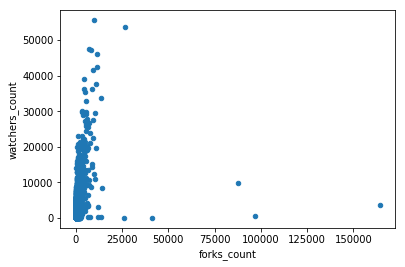

In [53]:
data = allData.drop_duplicates("name").sort_values("watchers_count", ascending=False)
data = data[data["watchers_count"] < 200000]
data.plot.scatter("forks_count", "watchers_count")

In [47]:
model = LinearRegression()
trainX = data[["forks_count"]]
model.fit(X=trainX, y=data["watchers_count"])
-cross_val_score(model, trainX, data["watchers_count"], cv=10, scoring="neg_mean_squared_error").mean()

1037761.7470117214

In [27]:
data = allData.drop_duplicates("name").sort_values("watchers_count", ascending=False)

,additions,body,changed_files,created_at,deletions,description,event_time,forks_count,has_wiki,language,name,number_commits,open_issues_count,secondary_user,size,user_login,watchers_count
10944,25.0,<!-- FreeCodeCamp Pull Request Template -->\r\...,1.0,2014-12-24T17:49:19Z,0.0,The https://FreeCodeCamp.com open source codeb...,2016-12-12 16:13:53,8120,True,JavaScript,FreeCodeCamp,1.0,201,NaN,43917,karuppiah7890,206798
4377,53.0,It was brought up on this [blog post](http://p...,1.0,2013-05-24T16:15:54Z,0.0,"A declarative, efficient, and flexible JavaScr...",2016-12-12 06:30:06,9997,True,JavaScript,react,1.0,646,NaN,148759,keyanzhang,55563
14358,27.0,**What kind of change does this PR introduce? ...,2.0,2010-01-06T00:34:37Z,1.0,HTML enhanced for web apps,2016-12-12 21:46:27,26688,True,JavaScript,angular.js,1.0,857,NaN,191230,gkalpak,53827
213334,1.0,The link is not anymore valid since that post ...,1.0,2013-11-16T02:37:24Z,1.0,A book series on JavaScript. @YDKJS on twitter.,2016-12-29 05:06:57,7145,True,JavaScript,You-Dont-Know-JS,1.0,97,NaN,7737,Fetz,47443
75016,74.0,NaN,1.0,2012-02-17T14:19:43Z,0.0,The iconic font and CSS toolkit,2016-12-24 15:22:14,8158,True,HTML,Font-Awesome,1.0,3892,NaN,35301,ivannieto,47264
27381,NaN,Useful aliases for `docker-machine`. Inspired ...,NaN,2009-08-28T18:15:37Z,NaN,"A delightful community-driven (with 1,000+ con...",2016-12-03 16:49:52,11312,True,Shell,oh-my-zsh,NaN,863,HaraldNordgren,18119,HaraldNordgren,46027
32392,1.0,### Summary ###\r\n<!--\r\nDescribe what this ...,1.0,2009-04-03T15:20:14Z,1.0,jQuery JavaScript Library,2016-12-04 00:21:43,11779,True,JavaScript,jquery,1.0,86,NaN,46095,mgol,42481
6191,NaN,"Currently, < WebView > allows you to pass JS t...",NaN,2015-01-09T18:10:16Z,NaN,A framework for building native apps with React.,2016-12-12 09:01:49,9459,True,JavaScript,react-native,NaN,873,yungsters,168685,lukemiles,41482
12647,NaN,This PR replaces https://github.com/electron/e...,NaN,2013-04-12T01:47:36Z,NaN,Build cross platform desktop apps with JavaScr...,2016-12-12 18:19:33,4595,False,C++,electron,NaN,392,kevinsawicki,36427,pfrazee,39114
366,NaN,This removes the `github.com/docker/docker/uti...,NaN,2013-01-18T18:10:57Z,NaN,Docker - the open-source application container...,2016-12-12 00:28:11,11222,True,Go,docker,NaN,2005,AkihiroSuda,228231,vdemeester,37698


'In this version I removed the progress bar, the creation of a file with debug information and I cleaned up the code a bit.'